In [3]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached simpletransformers-0.63.9-py3-none-any.whl (250 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 17.6 MB/s eta 0

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import sklearn
from sklearn.metrics import classification_report
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import matplotlib.pyplot as plt 
import seaborn as sns 
import pathlib
from collections import Counter 
from sklearn.datasets import load_files
import pathlib

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
#!ls "/content/gdrive/My Drive/IMDB Dataset.csv"

Mounted at /content/gdrive


In [6]:
cwd = pathlib.Path.cwd()
movie_reviews = cwd.joinpath("/content/gdrive/My Drive/IMDB Dataset.csv")

In [7]:
df_bonus = pd.read_csv(movie_reviews)
df_bonus.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
movies_train = pd.DataFrame({'text': df_bonus['review'], 'labels': 0})
movies_train = movies_train.head(5000)
movies_train

,text,labels
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",0
...,...,...
4995,An interesting slasher film with multiple susp...,0
4996,i watched this series when it first came out i...,0
4997,Once again Jet Li brings his charismatic prese...,0
4998,"I rented this movie, after hearing Chris Gore ...",0


In [9]:
cwd_2 = pathlib.Path.cwd()
restaurant_reviews = cwd.joinpath("/content/gdrive/My Drive/Yelp_Restaurant_Reviews.csv")

In [10]:
df_2 = pd.read_csv(restaurant_reviews)
df_2.head()

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


In [11]:
restaurants_train = pd.DataFrame({'text': df_2['Review Text'], 'labels': 1})
restaurants_train = restaurants_train.head(5000)
restaurants_train

,text,labels
0,All I can say is they have very good ice cream...,1
1,Nice little local place for ice cream.My favor...,1
2,A delicious treat on a hot day! Staff was very...,1
3,This was great service and a fun crew! I got t...,1
4,This is one of my favorite places to get ice c...,1
...,...,...
4995,Apple crisp croissants + marzipan almond crois...,1
4996,This is a great little Bakery. Found in the Ve...,1
4997,"Anytime I'm by the Time Warner Center in NYC, ...",1
4998,"Great atmosphere, amazing dishes. I had the ch...",1


In [12]:
cwd_3 = pathlib.Path.cwd()
book_reviews = cwd.joinpath("/content/gdrive/My Drive/Books_rating.csv")

In [13]:
df_3 = pd.read_csv(book_reviews)
df_3.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [14]:
books_train = pd.DataFrame({'text': df_3['review/text'], 'labels': 2})
books_train = books_train.head(5000)
books_train

,text,labels
0,This is only for Julie Strain fans. It's a col...,2
1,I don't care much for Dr. Seuss but after read...,2
2,"If people become the books they read and if ""t...",2
3,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",2
4,Philip Nel - Dr. Seuss: American IconThis is b...,2
...,...,...
4995,Lifetimes is a gently beautiful introduction t...,2
4996,This book is wonderful for small children. I p...,2
4997,I looked around for a book to help my wife and...,2
4998,"Knowing and working with many young children, ...",2


In [15]:
frames = [restaurants_train, books_train, movies_train]
train = pd.concat(frames)
train

,text,labels
0,All I can say is they have very good ice cream...,1
1,Nice little local place for ice cream.My favor...,1
2,A delicious treat on a hot day! Staff was very...,1
3,This was great service and a fun crew! I got t...,1
4,This is one of my favorite places to get ice c...,1
...,...,...
4995,An interesting slasher film with multiple susp...,0
4996,i watched this series when it first came out i...,0
4997,Once again Jet Li brings his charismatic prese...,0
4998,"I rented this movie, after hearing Chris Gore ...",0


In [16]:
from sklearn.model_selection import train_test_split

train, dev = train_test_split(train, test_size=0.1, random_state=0, 
                               stratify=train[['labels']])

In [17]:
# Model configuration # https://simpletransformers.ai/docs/usage/#configuring-a-simple-transformers-model 
model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.evaluate_during_training=True # to perform evaluation while training the model
# (eval data should be passed to the training method)

model_args.num_train_epochs=10 # number of epochs
model_args.train_batch_size=56 # batch size
model_args.learning_rate=4e-6 # learning rate
model_args.max_seq_length=256 # maximum sequence length
# Note! Increasing max_seq_len may provide better performance, but training time will increase. 
# For educational purposes, we set max_seq_len to 256.

# Early stopping to combat overfitting: https://simpletransformers.ai/docs/tips-and-tricks/#using-early-stopping
model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True
model_args.early_stopping_patience=2
model_args.evaluate_during_training_steps=56 # how often you want to run validation in terms of training steps (or batches)

In [18]:
# Checking steps per epoch
steps_per_epoch = int(np.ceil(len(train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch)) # 64 steps = validating 2 times per epoch

Each epoch will have 242 steps.


In [19]:
from simpletransformers.classification import ClassificationModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args=model_args, use_cuda=True)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [20]:
_, history = model.train_model(train, eval_df=dev)

  0%|          | 0/13500 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/242 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/242 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/242 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

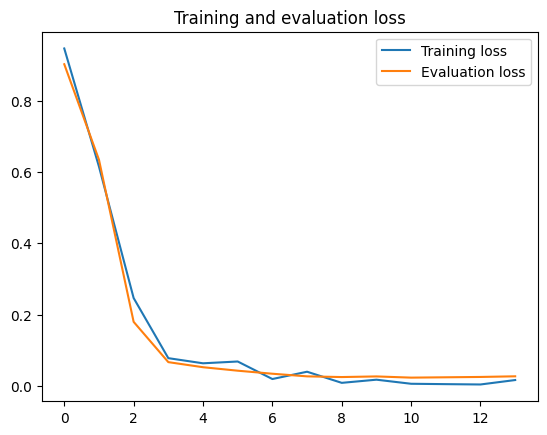

In [21]:
# Training and evaluation loss
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss')
plt.legend()

In [22]:
result, model_outputs, wrong_predictions = model.eval_model(dev)
result

  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

{'mcc': 0.9910006606673274, 'eval_loss': 0.026467315060027103}

In [23]:
from google.colab import files
uploaded = files.upload()

Saving sentiment-topic-final-test (1).tsv to sentiment-topic-final-test (1).tsv


In [24]:
test = pd.read_table('sentiment-topic-final-test (1).tsv')
test = pd.DataFrame({'text': test['text'], 'labels': test['topic']})


test.loc[test["labels"] == "movie", "labels"] = 0
test.loc[test["labels"] == "book", "labels"] = 2
test.loc[test["labels"] == "restaurant", "labels"] = 1

test['labels'] = test['labels'].astype('int')
print(test['labels'])

0    0
1    1
2    1
3    2
4    0
5    0
6    1
7    0
8    0
9    2
Name: labels, dtype: int64


In [25]:
predicted, probabilities = model.predict(test.text.to_list())
test['predicted'] = predicted

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [26]:
test

,text,labels,predicted
0,It took eight years for Warner Brothers to rec...,0,0
1,All the New York University students love this...,1,1
2,This Italian place is really trendy but they h...,1,1
3,"In conclusion, my review of this book would be...",2,2
4,The story of this movie is focused on Carl Bra...,0,0
5,Chris O'Donnell stated that while filming for ...,0,0
6,My husband and I moved to Amsterdam 6 years ag...,1,1
7,Dame Maggie Smith performed her role excellent...,0,0
8,The new movie by Mr. Kruno was shot in New Yor...,0,0
9,"I always have loved English novels, but I just...",2,2


In [27]:
print(classification_report(test['labels'], test['predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

